# Heart Disease Logistic Regression

In this notebook, a dataset with false and positive heart disease patients is analyzed and fitted to a logistic regression model to predict other cases.

# Outline
- [ 1 - Packages ](#1)
- [ 2 - Preprocessing Data](#2)
  - [ 2.1 Loading and Visualizing the Data](#2.1)
  - [ 2.2 Feature Correlation](#2.2)
- [ 3 - Model](#3)
  - [ 3.1 Logistic Regression](#3.1)
  - [ 3.2 Polynomal Regression](#3.2)
- [ 4 - Results](#4)

<a name="1"></a>
## 1 - Packages 

Below are all the needed packages for this notebook.
- [numpy](https://www.numpy.org) is the fundamental package for scientific computing with Python.
- [pandas](https://pandas.pydata.org) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool.
- [matplotlib](https://matplotlib.org) is a comprehensive library for creating static, animated, and interactive visualizations in Python.
- [seaborn](https://seaborn.pydata.org/index.html#) is a Python data visualization library based on matplotlib
- [scikit-learn](https://scikit-learn.org/stable/) is a library of simple and efficient tools for predictive data analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import classification_report

<a name="2"></a>
## 2 - Preprocessing Data

The original database contains 76 attributes, but we'll refer to using a subset of 14 of them, as we are concerned with only the relevant features.
<br/><br/>
Age: Age

Sex: Sex (1 = male; 0 = female)

ChestPain: Chest pain (typical, asymptotic, nonanginal, nontypical)

RestBP/trestbps: Resting blood pressure

Chol: Serum cholestoral in mg/dl

Fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

RestECG: Resting electrocardiographic results

MaxHR/thalac: Maximum heart rate achieved

ExAng: Exercise induced angina (1 = yes; 0 = no)

Oldpeak: ST depression induced by exercise relative to rest

Slope: Slope of the peak exercise ST segment

Ca: Number of major vessels colored by flourosopy (0 - 3)

Thal: (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: AHD - Diagnosis of heart disease (1 = yes; 0 = no)
<br/><br/>
The dataset can be found here: [Heart Disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

<a name="2.1"></a>
### 2.1 Loading and Visualizing the Data

In [2]:
#Load Data
data = pd.read_csv("Data/heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print(f"data shape: {data.shape}")

data shape: (303, 14)


Let's explore some our data by plotting it into graphs.

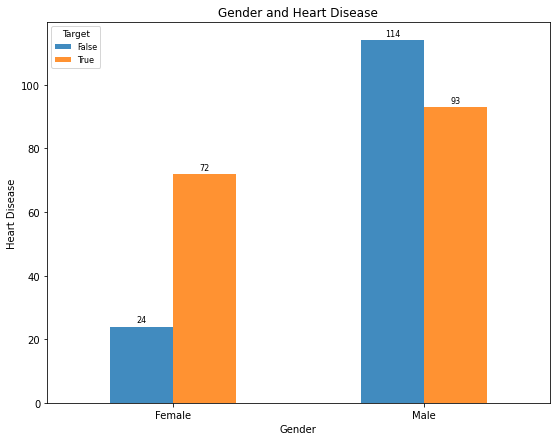

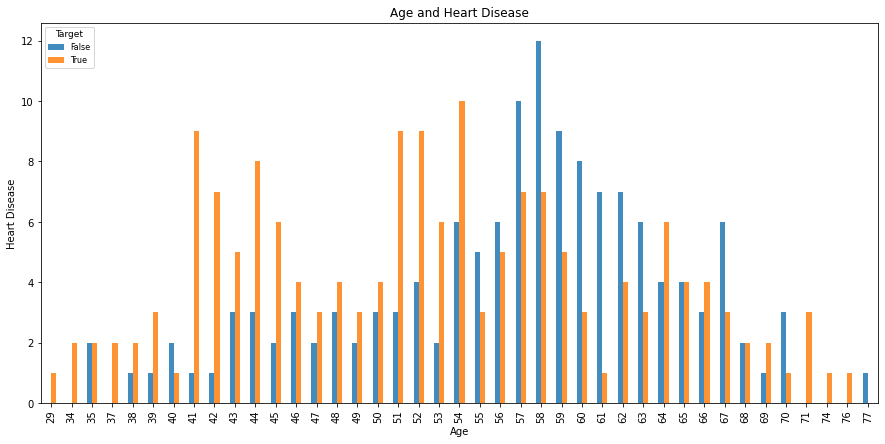

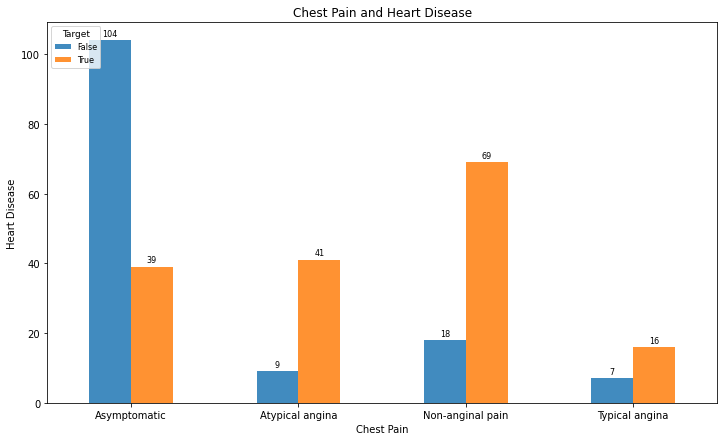

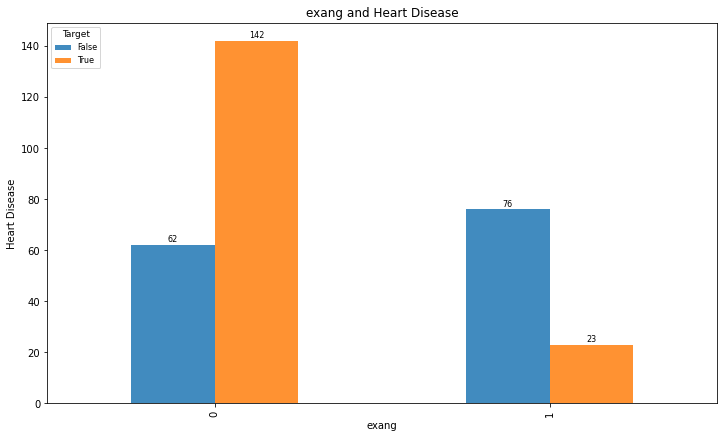

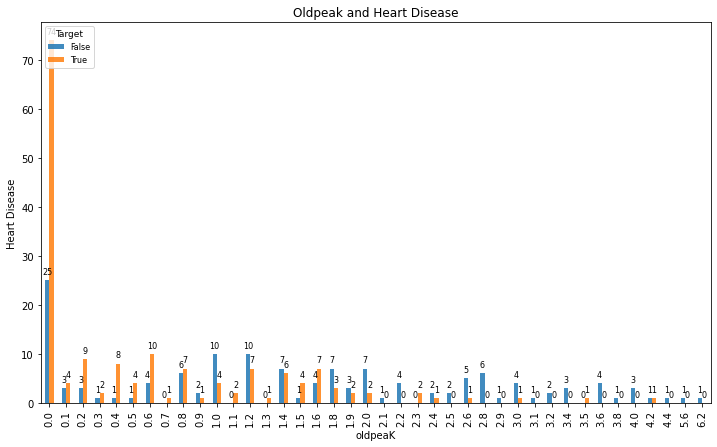

In [5]:
#Plot data
ax = pd.crosstab(data.sex, data.target).plot(kind='bar', figsize=(9,7), alpha=0.85)
plt.title('Gender and Heart Disease')
plt.xticks([0,1], ['Female', 'Male'], rotation=0)
plt.xlabel('Gender')
plt.ylabel('Heart Disease')
plt.legend(labels=['False', 'True'], title='Target', fontsize='8', title_fontsize='9', loc='upper left', frameon=True)

for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2, rect.get_height()+1.25, rect.get_height(), horizontalalignment='center', fontsize=8)

    
ax = pd.crosstab(data.age, data.target).plot(kind='bar', figsize=(15,7), alpha=0.85)
plt.title('Age and Heart Disease')
plt.xlabel('Age')
plt.ylabel('Heart Disease')
plt.legend(labels=['False', 'True'], title='Target', fontsize='8', title_fontsize='9', loc='upper left', frameon=True)

    
ax = pd.crosstab(data.cp, data.target).plot(kind='bar', figsize=(12,7), alpha=0.85)
plt.title('Chest Pain and Heart Disease')
plt.xlabel('Chest Pain')
plt.ylabel('Heart Disease')
#plt.xticks([0,1], ['asympt', 'abnang', 'notang', 'angina'], rotation=0)
plt.xticks([0,1,2,3], ['Asymptomatic', 'Atypical angina', 'Non-anginal pain', 'Typical angina'], rotation=0)
plt.legend(labels=['False', 'True'], title='Target', fontsize='8', title_fontsize='9', loc='upper left', frameon=True)

for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2, rect.get_height()+1.25, rect.get_height(), horizontalalignment='center', fontsize=8)
    

ax = pd.crosstab(data.exang, data.target).plot(kind='bar', figsize=(12,7), alpha=0.85)
plt.title('exang and Heart Disease')
plt.xlabel('exang')
plt.ylabel('Heart Disease')
plt.legend(labels=['False', 'True'], title='Target', fontsize='8', title_fontsize='9', loc='upper left', frameon=True)

for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2, rect.get_height()+1.25, rect.get_height(), horizontalalignment='center', fontsize=8)

    
ax = pd.crosstab(data.oldpeak, data.target).plot(kind='bar', figsize=(12,7), alpha=0.85)
plt.title('Oldpeak and Heart Disease')
plt.xlabel('oldpeaK')
plt.ylabel('Heart Disease')
plt.legend(labels=['False', 'True'], title='Target', fontsize='8', title_fontsize='9', loc='upper left', frameon=True)

for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2, rect.get_height()+1.25, rect.get_height(), horizontalalignment='center', fontsize=8)

- We can observe that females tend to be diagnosed with heart disease more than males in our data, although there are more male patients.


- The age graph, shows most people diagnosed with heart disease are in their 40s and 50s.


- Most patients with asymptomatic chest pain do not have heart disease, while most patients with the other types of chest pain are diagnosed with heart disease.


- Patients with no excercise induced angina were more likely to be diaganosed with hear disease.


- Most patients with heart disease had an oldpeak value of 0.

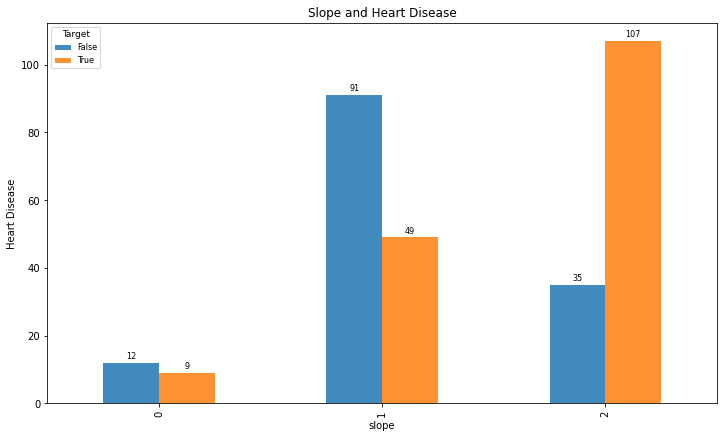

In [6]:
#Plot slope graph
ax = pd.crosstab(data.slope, data.target).plot(kind='bar', figsize=(12,7), alpha=0.85)
plt.title('Slope and Heart Disease')
plt.xlabel('slope')
plt.ylabel('Heart Disease')
plt.legend(labels=['False', 'True'], title='Target', fontsize='8', title_fontsize='9', loc='upper left', frameon=True)

for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2, rect.get_height()+1.25, rect.get_height(), horizontalalignment='center', fontsize=8)

In this last graph, we can see that patients with a slope value of 2, have a high chance of having heart disease.

<a name="2.2"></a>
### 2.2 Feature Correlation

Let's explore the relation between the features and label with a correlation map.

<AxesSubplot:>

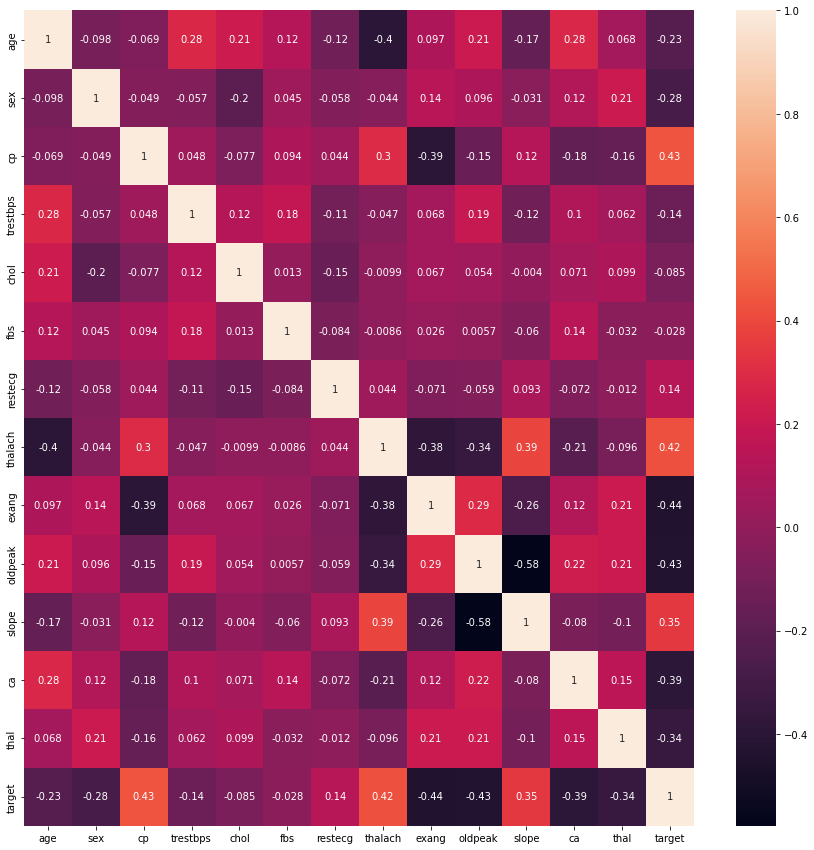

In [7]:
#Create correlation map
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, linewidths=0, ax=ax)#, cmap='hot')

The correlation map shows that cholesterol and fasting blood sugar have a very low correlation with the target label, so we can remove these features.

In [8]:
#Get features and labels
x = data.drop(['chol', 'fbs', 'target'], axis=1).values
y = data['target'].values

Now we can split our data.

In [9]:
#split data for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

<a name="3"></a>
## 3 - Model

<a name="3.1"></a>
### 3.1 Logistic Regreession

We fit the data using simple Logistic Regression.

In [10]:
#Create model
model = LogisticRegression(max_iter=900)
model.fit(x_train, y_train)

LogisticRegression(max_iter=900)

In [11]:
print(f"Model score: {model.score(x_train,y_train)}")
print(f"Test set score: {model.score(x_test,y_test)}")

Model score: 0.8160377358490566
Test set score: 0.9230769230769231


In [12]:
#View test report
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92        43
           1       0.90      0.96      0.93        48

    accuracy                           0.92        91
   macro avg       0.93      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



Our model has a decent score of 0.81, and has an even better score of 0.92 for the testing data with good precision.

<a name="3.2"></a>
### 3.2 Polynomial Regression

Let's see if adding polynomials will improve our model. We'll also include the original model with no polynomials for reference.

As we are dealing with some bigger polynomial degrees, we'll also have a scaled version of the models.

In [13]:
#Scale features
scaler = StandardScaler().fit(x_train)
x_scaled = scaler.transform(x_train)
x_scaled_test = scaler.transform(x_test)

In [14]:
degrees = [1, 2, 3, 4, 5]

#Train polynomial models
for i in range(len(degrees)):
    
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    logistic_regression = LogisticRegression(max_iter=1000)
    
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("logistic_regression", logistic_regression),
        ]
    )
    
    print("\n\nDegree: ", i)
    
    pipeline.fit(x_train, y_train)
    print("Model score: ", pipeline.score(x_train, y_train))
    print("Test score: ", pipeline.score(x_test, y_test))
    
    pipeline.fit(x_scaled, y_train)
    print("\nScaled Model: ", pipeline.score(x_scaled, y_train))
    print("Scaled Test: ", pipeline.score(x_scaled_test, y_test))



Degree:  0
Model score:  0.8160377358490566
Test score:  0.9230769230769231

Scaled Model:  0.8066037735849056
Scaled Test:  0.9120879120879121


Degree:  1
Model score:  0.839622641509434
Test score:  0.8241758241758241

Scaled Model:  0.9433962264150944
Scaled Test:  0.8461538461538461


Degree:  2


C:\Users\eugen\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\eugen\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Model score:  0.8537735849056604
Test score:  0.8021978021978022

Scaled Model:  1.0
Scaled Test:  0.8241758241758241


Degree:  3


C:\Users\eugen\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model score:  0.839622641509434
Test score:  0.8021978021978022

Scaled Model:  1.0
Scaled Test:  0.8241758241758241


Degree:  4
Model score:  0.8679245283018868
Test score:  0.8351648351648352

Scaled Model:  1.0
Scaled Test:  0.8241758241758241


C:\Users\eugen\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<a name="4"></a>
## 4 - Results

From the pipeline, we can observe the polynomial models performed worse than the original. Some of the models failed to converge, and even where the scaled models achieved a perfect score, they performed worse with the test data. Probably cases of overfitting. The original unscaled simple logistic regression proved to be the best, and a good model.